<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM6</center></h2>

## HEART DISEASE DATASET

#### IMPORTING LIBRARIES

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#### IMPORTING THE DATASET

In [28]:
dataset = pd.read_csv("heart_disease_missing.csv")
dataset['thal'] = dataset['thal'].round()
dataset.head(10)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.355450,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.586926,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.000000,1.000000


#### DEALING WITH NaN VALUES AND ANALYSING THE DATASET

In [29]:
dataset['thal'].fillna(2, inplace = True)
dataset['trestbps'].fillna(131.784610, inplace = True)
dataset['thalach'].fillna(149.65, inplace = True)
dataset['chol'].fillna(244.133256, inplace = True)
dataset['oldpeak'].fillna(1.113106, inplace = True)
dataset['restecg'].fillna(1.0, inplace = True)
dataset.dropna(subset= ['sex','age','cp','restecg','thal','fbs','restecg','thalach','exang','oldpeak','slope','ca'],inplace=True)
dataset_features = dataset.iloc[:,:-1]
dataset_target = dataset.iloc[:, -1]

<p>All the missing values of the numeric features i.e., NaN values, are replaced by the particular feature's mean in the dataset. However, all the missing values of categorical features are dropped as replacing with the highest frequency could be misleading. The final description of the dataset is shown in the box above.</p> 

In [30]:
a = pd.get_dummies(dataset_features['cp'], prefix = "cp")
b = pd.get_dummies(dataset_features['thal'], prefix = "thal")
c = pd.get_dummies(dataset_features['slope'], prefix = "slope")

frames = [dataset_features, a, b, c]
dataset_features = pd.concat(frames, axis = 1)
dataset_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_0,cp_1,cp_2,cp_3,thal_1.0,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,...,0,0,1,0,0,1,0,0,1,0
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,...,1,0,0,0,0,0,1,0,1,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,...,0,0,1,0,0,1,0,0,0,1
3,51,1,2,99.934001,244.133256,0,1.0,143.049207,1,1.195082,...,0,0,1,0,0,1,0,0,1,0
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,...,1,0,0,0,0,0,1,0,1,0


#### DATASET PREPARATION BEFORE TRAINING

In [31]:
X = dataset_features.iloc[:,:].values
y = dataset_target.values

X_train, X_sep, y_train, y_sep = train_test_split(X, y, test_size = 0.4, random_state = 275)
X_test, X_val, y_test, y_val = train_test_split(X_sep, y_sep, test_size = 0.5, random_state = 275)

X_val.shape

(42, 23)

<ul>
            <li>The features and target are separated and stored in the X and y dataframe, respectively. Then both the                         dataframe are converted to NumPy arrays before splitting the data.</li>
            <li>Using the sklearn train_test_split method twice, the numpy arrays are splitted into train,test and validation                   set(60%,20%,20%).</li>
            <li><i>X_train shape = (120, 13)</i></li>
            <li><i>X_test and X_val shape = (40, 13)</i></li>
            <li><i>y_train shape = (120,1)</i></li>
            <li><i>y_test and y_val shape = (40,1)</i></li>
</ul>

#### TRAINING ON DEFAULT PARAMETERS

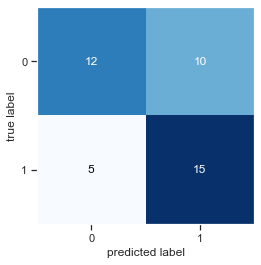

The accuracy score of KNN algorithm at default parameters: 64.28571428571429%


In [32]:
knn_validation = KNeighborsClassifier()
knn_validation.fit(X_train, y_train)

y_pred = knn_validation.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at default parameters: {accuracy_score(y_val, y_pred)*100}%")

<p>The model is trained based on the default parameters provided by the KNeighborsClassifier i.e. [k = 5, weights = uniform and p = 2 (euclidean_distance)] and it obtained an accuracy of 60.00% on validation set.</p>

#### CHECKING ACCURACY FOR DIFFERENT VALUES OF K

Text(0.5, 1.0, 'K-NN at different values of K')

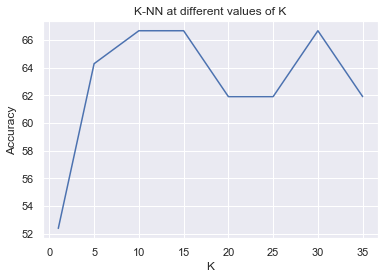

In [33]:
k_val = [1,5,10,15,20,25,30,35]
accuracy = []

for k in k_val:
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn1.fit(X_train, y_train)
        y_pred = knn1.predict(X_val)
        scr = accuracy_score(y_val, y_pred)
        accuracy.append(scr*100)
# classification v/s accuracy curve to report the best value of K
plt.plot(k_val, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-NN at different values of K")

<p>The above box shows the variation of k (nearest neighbors) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of k.</p>
<table>
  <tr>
    <th>K</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>1</td>
    <td>47.5%</td>
  </tr>
    <tr>
    <td>2</td>
    <td>60.0%</td>
  </tr>
    <tr>
    <td>3</td>
    <td>62.5%</td>
  </tr>
    <tr>
    <td>4</td>
    <td>75.00%</td>
  </tr>
    <tr>
    <td>5</td>
    <td>60.00%</td>
  </tr>
     <tr>
    <td>10</td>
    <td>57.50%</td>
  </tr>
     <tr>
    <td>15</td>
    <td>67.5%</td>
  </tr>
     <tr>
    <td>20</td>
    <td>55.00%</td>
  </tr>
     <tr>
    <td>25</td>
    <td>67.5%</td>
  </tr>
     <tr>
    <td>30</td>
    <td>70.0%</td>
  </tr>
  <tr>
    <td>35</td>
    <td>65.0%</td>
  </tr>
</table>
<p>Therefore, at k = 4 we have obtained the best accuracy of 75% which will be selected as the best parameter for test set.</p>

<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM7</center></h2>

Text(0.5, 1.0, 'K-NN at different distance metrics')

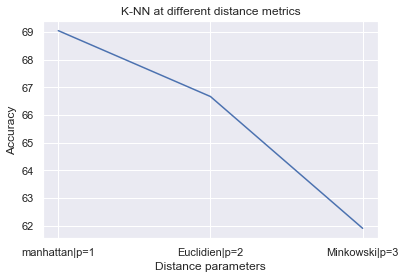

In [34]:
# testing on different distance metrics for the perfect model
# p = 1 manhattan, p = 2 eucliden, p = random minkowski
dist = ['manhattan|p=1', 'Euclidien|p=2', 'Minkowski|p=3']
accy = []
for i in range(1,4):
    knn_dist = KNeighborsClassifier(n_neighbors=10, weights='distance', p=i)
    knn_dist.fit(X_train, y_train)

    y_pred_dist = knn_dist.predict(X_val)
    score = accuracy_score(y_val, y_pred_dist)
    accy.append(score*100)

plt.plot(dist,accy)
plt.xlabel("Distance parameters")
plt.ylabel("Accuracy")
plt.title("K-NN at different distance metrics")

<p>The above box shows the variation of p (distance metric) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of p.</p>
<table>
  <tr>
    <th>Distance metric</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>p=1|Manhattan</td>
    <td>82.5%</td>
  </tr>
    <tr>
    <td>p=2|Euclidean</td>
    <td>82.5%</td>
  </tr>
     <tr>
    <td>p=random|Minkowski</td>
    <td>82.5%</td>
  </tr>
</table>
<p>The accuracy is same for all the measures therfore, the selected default value of p i.e. 2.</p>

#### SCALING THE DATASET USING STANDARD SCALER

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_val_scaled = sc.transform(X_val)

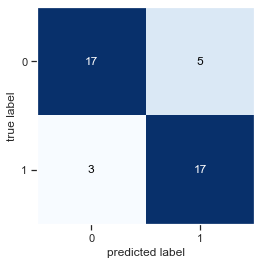

The accuracy score of KNN algorithm at the best parameters on validation set after normalization: 80.95238095238095%


In [39]:
knn_normalized = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)
knn_normalized.fit(X_train_scaled, y_train)

y_pred = knn_normalized.predict(X_val_scaled)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on validation set after normalization: {accuracy_score(y_val, y_pred)*100}%")

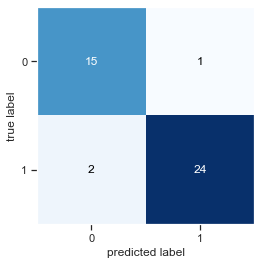

The accuracy score of KNN algorithm at the best parameters on validation set after normalization: 92.85714285714286%


In [37]:
knn_normalized = KNeighborsClassifier(n_neighbors=10)
knn_normalized.fit(X_train_scaled, y_train)

y_pred = knn_normalized.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on validation set after normalization: {accuracy_score(y_test, y_pred)*100}%")

In [38]:
X_train_scaled.shape

(126, 23)